# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [26]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [125]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))
    pos = n//2 + 1

    A[pos, pos] = 1

    circles = n // 2
    start = 2

    for i in range(1, circles + 1):
        #matrix = np.arange(start, 8 * i + start).reshape(4, -1)
        length = 2 * i

        right = np.arange(start + length - 1, start - 1, -1)
        top = np.arange(start + 2 * length - 1, start + length - 1, -1)
        left = np.arange(start + 2 * length, start + 3 * length)
        bottom = np.arange(start + 3 * length, start + 4 * length)

        # pravá strana
        A[pos - i:pos + i, pos + i] = right #matrix[0, :][::-1]
        # horní strana
        A[pos - i, pos - i:pos + i] = top #matrix[1, :][::-1]
        # levá strana
        A[pos - i + 1:pos + i + 1, pos - i] = left #matrix[2, :]
        # dolní strana
        A[pos + i, pos - i + 1:pos + i + 1] = bottom #matrix[3, :]

        start += 8 * i

    return A[1:-1, 1:-1]


In [126]:
print("test:")
B = integer_spiral_numpy(7)
print(B)

print()
if B.all() == A.all():
    print("Matice A a B jsou stejné!")
else:
    print("Matice A a B se liší!")

test:
[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]

Matice A a B jsou stejné!


In [127]:
# TODO otestujte rychlost obou implementací
print("test n = 11")
%timeit integer_spiral(11)
%timeit integer_spiral_numpy(11)

print("test n = 101")
%timeit integer_spiral(101)
%timeit integer_spiral_numpy(101)

print("test n = 1001")
%timeit integer_spiral(1001)
%timeit integer_spiral_numpy(1001)

print("test n = 10001")
%timeit integer_spiral(10001)
%timeit integer_spiral_numpy(10001)

test n = 11
40.2 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
26.5 µs ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
test n = 101
3.5 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
175 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
test n = 1001
397 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.41 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
test n = 10001
41.3 s ± 2.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
723 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
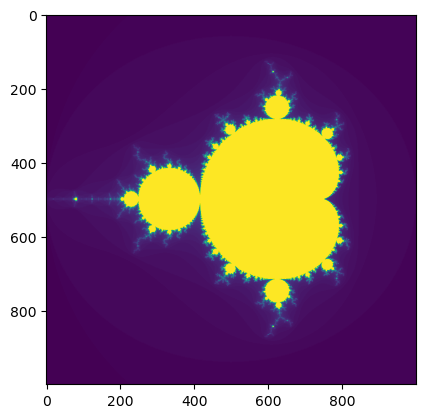

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [ ]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):

    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    
    C = X + 1j * Y

    Z = np.zeros_like(C)
    divergence_matrix = np.zeros_like(C, dtype=int)

    for i in range(k):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + C[mask]
        divergence_matrix[mask] += 1

    return divergence_matrix


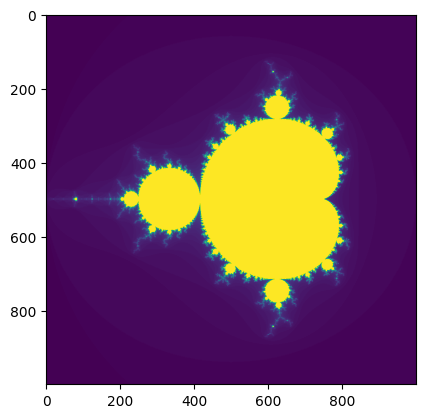

In [23]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
#print(divergence_matrix)
plt.imshow(divergence_matrix)
#plt.title('Mandelbrotova množina')

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

# Julia set

In [141]:
def julia_set(c, x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):

    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    
    Z = X + 1j * Y

    divergence_matrix = np.zeros_like(Z, dtype=int)

    for i in range(k):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + c
        divergence_matrix[mask] = i

    return divergence_matrix


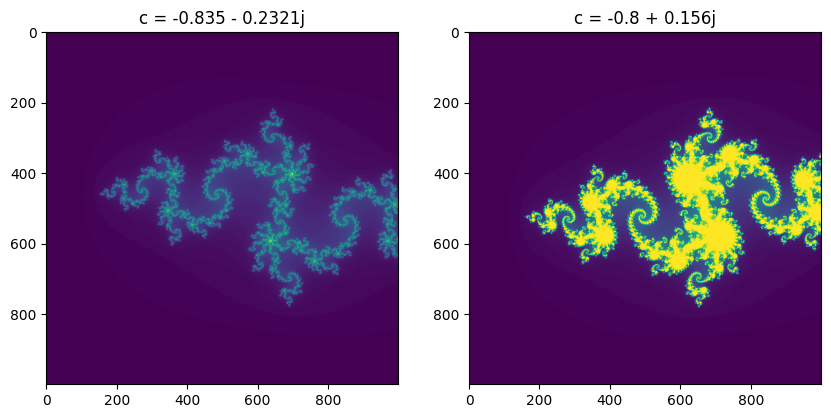

In [142]:
c = -0.835 - 0.2321j
julia_matrix_a = julia_set(c=c)

c = -0.8 + 0.156j
julia_matrix_b = julia_set(c=c)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(julia_matrix_a)
axes[0].set_title('c = -0.835 - 0.2321j')

axes[1].imshow(julia_matrix_b)
axes[1].set_title('c = -0.8 + 0.156j')

plt.show()

# Ulam spiral

In [143]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def ulam_spiral_from_integer_spiral(n):
    spiral_matrix = integer_spiral_numpy(n).astype(int)
    
    ulam_matrix = np.zeros_like(spiral_matrix)
    
    for i in range(spiral_matrix.shape[0]):
        for j in range(spiral_matrix.shape[1]):
            if is_prime(spiral_matrix[i, j]):
                ulam_matrix[i, j] = 1
    
    return ulam_matrix

[[1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 0 1 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]]


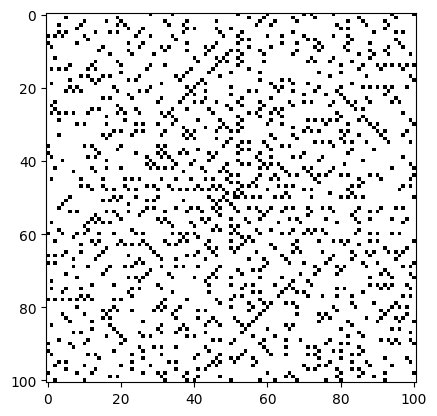

In [154]:
ulam_11 = ulam_spiral_from_integer_spiral(11)
print(ulam_11)

ulam_101 = ulam_spiral_from_integer_spiral(101)
plt.imshow(ulam_101, cmap='Greys')